In [1]:
# default_exp core

# Core functions
> Some useful functions

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
from nbdev.showdoc import *

In [4]:
#export
def stats(x):
    "Returns `mean` and `std` of a tensor"
    return x.mean(),x.std()

In [5]:
t = torch.randn((50,50))
t[:5,:5]

tensor([[ 0.9286, -0.2953, -1.2908,  0.8852, -0.1019],
        [-0.6417, -0.1461, -0.4287,  0.4329, -1.2059],
        [ 0.8204, -0.9540, -0.0658,  0.4746, -0.8641],
        [-1.4552, -1.7285, -0.8970, -1.5622, -1.2735],
        [ 0.3761,  0.8173,  0.5098, -0.0591,  0.4272]])

In [6]:
stats(t)

(tensor(0.0043), tensor(0.9670))

## Cross Entropy Loss

Softmax of our activations is defined by:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{e^{x_{0}} + e^{x_{1}} + \cdots + e^{x_{n-1}}}$$

or more concisely:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{\sum_{0 \leq j \leq n-1} e^{x_{j}}}$$ 

where $n$ is the number of classes.

In practice, we will need the log of the softmax when we calculate the loss.

In [7]:
#export
def log_softmax(x):
    
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [8]:
log_softmax(t)

tensor([[-3.2889, -4.5127, -5.5082,  ..., -5.7149, -5.2011, -3.5205],
        [-4.7243, -4.2287, -4.5113,  ..., -2.9726, -3.0700, -2.8482],
        [-3.5969, -5.3712, -4.4830,  ..., -4.2475, -3.8662, -4.3414],
        ...,
        [-4.2794, -4.6401, -5.4084,  ..., -4.8664, -4.6423, -5.1971],
        [-5.8388, -3.2967, -4.3515,  ..., -5.8626, -6.9136, -4.9014],
        [-5.3133, -3.8779, -5.1986,  ..., -5.3160, -5.3171, -5.5674]])

In [9]:
#export
def accuracy(pred,y):
    "Accuracy metric"
    return (pred.argmax(dim=1) == y).float().mean()

In [10]:
#export
def error(pred,y):
    "Error metric"
    return 1-accuracy(pred,y)

In [11]:
#export
def nll(pred,yb):
    "Negative Log Likelihood Loss function"
    return -pred[range(yb.shape[0]), yb].mean()

## Plotting

In [12]:
#export
def plotdist(x,showsigmas=True):
    "Plot distribution `x` with optional `showsigmas`"
    fig = plt.figure(figsize=(4,3))
    m,s = x.mean(), x.std()
    n,_,_ = plt.hist(x.reshape(-1),bins=100);
    l = [i*s for i in (-3,-2,-1,1,2,3)] # three sigmas
    l.append(m) # plus mean
    if showsigmas: plt.vlines(l, 0, n.max(), color='white', alpha=0.2)
    ax = plt.title(f'Mean = {round(float(m),3)}; $\sigma$ = {round(float(s),3)}');

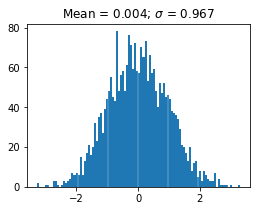

In [13]:
plotdist(t)

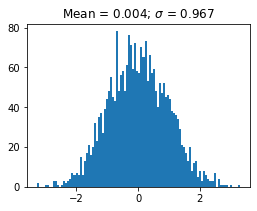

In [14]:
plotdist(t,showsigmas=False)

In [15]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_mnist.ipynb.
Converted 99_index.ipynb.
